## 张量与张量分解概述

### 张量的概念和定义
- 学习内容:
    - 什么是张量？
        - 张量是向量和矩阵在高维空间中的推广。
        - 标量（0阶张量）：一个数字，如 5。
        - 向量（1阶张量）：一串数字，如 [1, 2, 3]。
        - 矩阵（2阶张量）：二维数组，如 [[1, 2], [3, 4]]。
        - 张量（N阶张量）：一个多维数组，如一张彩色图像（3阶张量，高度 x 宽度 x 通道数）。
    - 张量的基本组成部分:
        - 阶数 (Order)：张量的维度数量，也叫模式 (mode) 或轴 (axis)。
        - 纤维 (Fibers)：通过固定除一个维度以外的所有维度所得到的向量。例如，一个彩色图像张量中，固定 (x, y) 坐标，得到的就是一个像素的 RGB 值向量，这就是一个纤维。
        - 切片 (Slices)：通过固定一个维度所得到的矩阵。例如，一个彩色图像张量中，固定通道维度，得到的就是一个通道的二维矩阵（即灰度图），这就是一个切片。

In [2]:
# 使用 NumPy 模拟张量: 通过创建不同阶数的 NumPy 数组来直观理解张量。
import numpy as np

# 0 阶张量：标量
scalar = np.array(5)
print(f"0阶张量(Scalar)：{scalar}，Order: {scalar.ndim}")

# 1 阶张量：向量
vector = np.array([1, 2, 3])
print(f"1阶张量(Vector)：{vector}，Order: {vector.ndim}")

# 2 阶张量：矩阵
matrix = np.array([[1, 2], [3, 4]])
print(f"2阶张量(Matrix)：{matrix}，Order: {matrix.ndim}")

# 3 阶张量：张量(图像)
tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(f"3阶张量(Tensor)：{tensor}，Order: {tensor.ndim}")


0阶张量(Scalar)：5，Order: 0
1阶张量(Vector)：[1 2 3]，Order: 1
2阶张量(Matrix)：[[1 2]
 [3 4]]，Order: 2
3阶张量(Tensor)：[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]，Order: 3


# 找出他的纤维和切片
print("\n--- Fibers and Slices ---")
# 固定第1和第2维，得到纤维
fibers_at_0_0 = tensor[0, 0, :]
print(f"Fiber at (0, 0)：{fibers_at_0_0}")

# 固定第3维，得到切片
slice_at_1 = tensor[:, :, 1]
print(f"Slice at (1)：{slice_at_1}")

### 张量分解的必要性与核心思想
* 学习内容:

    * 为什么需要张量分解？
        * 降维：高维张量数据通常包含大量冗余信息，张量分解可以将张量分解为几个更小的张量和矩阵，从而显著减少数据量。
        * 特征提取：分解后的因子矩阵通常包含了数据的底层模式和潜在特征，这比直接使用原始张量更有效。
        * 数据压缩：在深度学习中，张量分解可以用于压缩模型权重，减小模型大小，提高推理速度。
        * 数据补全与去噪：通过分解得到的低秩张量可以用于恢复缺失或被噪声污染的数据。
        * 核心思想: 将一个高阶张量分解为几个因子矩阵和一个核心张量的乘积。这类似于将一个矩阵通过奇异值分解 (SVD) 分解为 U * S * V^T。

    * 主要张量分解类型:
        * CP 分解 (CANDECOMP/PARAFAC)：将张量分解为一系列秩-1张量的和。它假设张量的每个维度都是独立的，非常适合捕捉数据的潜在成分。
        * Tucker 分解: 将张量分解为一个核心张量和几个因子矩阵的乘积。它更灵活，能够捕捉到维度之间的交互关系。
        * Tensorial SVD (T-SVD)：张量版的奇异值分解，主要应用于三阶张量，常用于图像和视频数据处理。

### Tensorly 核心概念回顾
* 学习内容:简单回顾一下 CP 分解的核心思想：将一个张量分解为一系列秩为1的张量之和。每个秩-1张量都是由几个向量的外积（Outer Product）得到的。
* 核心组件：
    * 因子矩阵：CP分解将一个N阶张量分解为N个秩为1张量之和
* 公式：
$$ $$



In [7]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
# from tensorly.tenalg

# 1.创建一个模拟的 3×4×5 的三阶张量
tensor = tl.tensor(np.arange(60).reshape(3, 4, 5))
print("Original Tensor:\n",tensor)
print("Shape of the Original Tensor:", tensor.shape)

# 2.进行CP分解
rank = 2
weights, factors = parafac(tensor, rank)

# parafac() 返回两个值：
# - weights: 一个一维数组，包含了每个秩-1张量在和中的权重。
# - factors: 一个列表，包含了每个维度的因子矩阵。

print("\n --- CP Decomposition Results ---")
print(f"Decomposition Rank: {rank}")
print(f"Weights: {weights}")
print(f"Factors(A_0, A_1, A_2): ")
for i, factor in enumerate(factors):
    print(f"A_{i}:\n{factor}")

# 3.将分解后的因子矩阵和权重组合成原始张量
# 我们可以通过 `tl.cp_to_tensor` 函数将分解结果重构回原始张量
reconstructed_tensor = tl.cp_to_tensor((weights, factors))
print("\n--- Reconstructed Tensor ---")
print("\nReconstructed Tensor:\n", reconstructed_tensor)

# 4.衡量重构误差
# 我们用MSE 来衡量重构的误差
mse = tl.norm(tensor - reconstructed_tensor) ** 2 / tl.norm(tensor) ** 2
print(f"\nReconstruction MSE: {mse}")

Original Tensor:
 [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]
Shape of the Original Tensor: (3, 4, 5)

 --- CP Decomposition Results ---
Decomposition Rank: 2
Weights: [1. 1.]
Factors(A_0, A_1, A_2): 
A_0:
[[ 88.05846804  -6.84430524]
 [149.61966593  -3.12939501]
 [211.18086381   0.58551522]]
A_1:
[[0.41878982 1.52751917]
 [0.47269771 1.24114878]
 [0.52660561 0.95477838]
 [0.5805135  0.66840799]]
A_2:
[[0.44049634 1.574494  ]
 [0.45045525 1.50318846]
 [0.46041417 1.43188293]
 [0.47037308 1.36057739]
 [0.480332   1.28927185]]

--- Reconstructed Tensor ---

Reconstructed Tensor:
 [[[-0.21641228  0.89633817  2.00908862  3.12183907  4.23458952]
  [ 4.96066271  5.98092929  7.00119586  8.02146244  9.04172901]
  [10.1377377  11.0655204  11.9933031  12.9210858  13.8488685 ]
  [15.3148127  16.15011152 16.985

### CP 分解在图像数据上的应用
* **学习内容:** 结合我们之前学习的图像处理知识，对一个实际的彩色图像张量进行 CP 分解。我们将观察不同秩 (rank) 对图像重构质量的影响。

Orginal image tesor shape:(128, 128, 3)
Mean Squared Error: 58.20001220703125


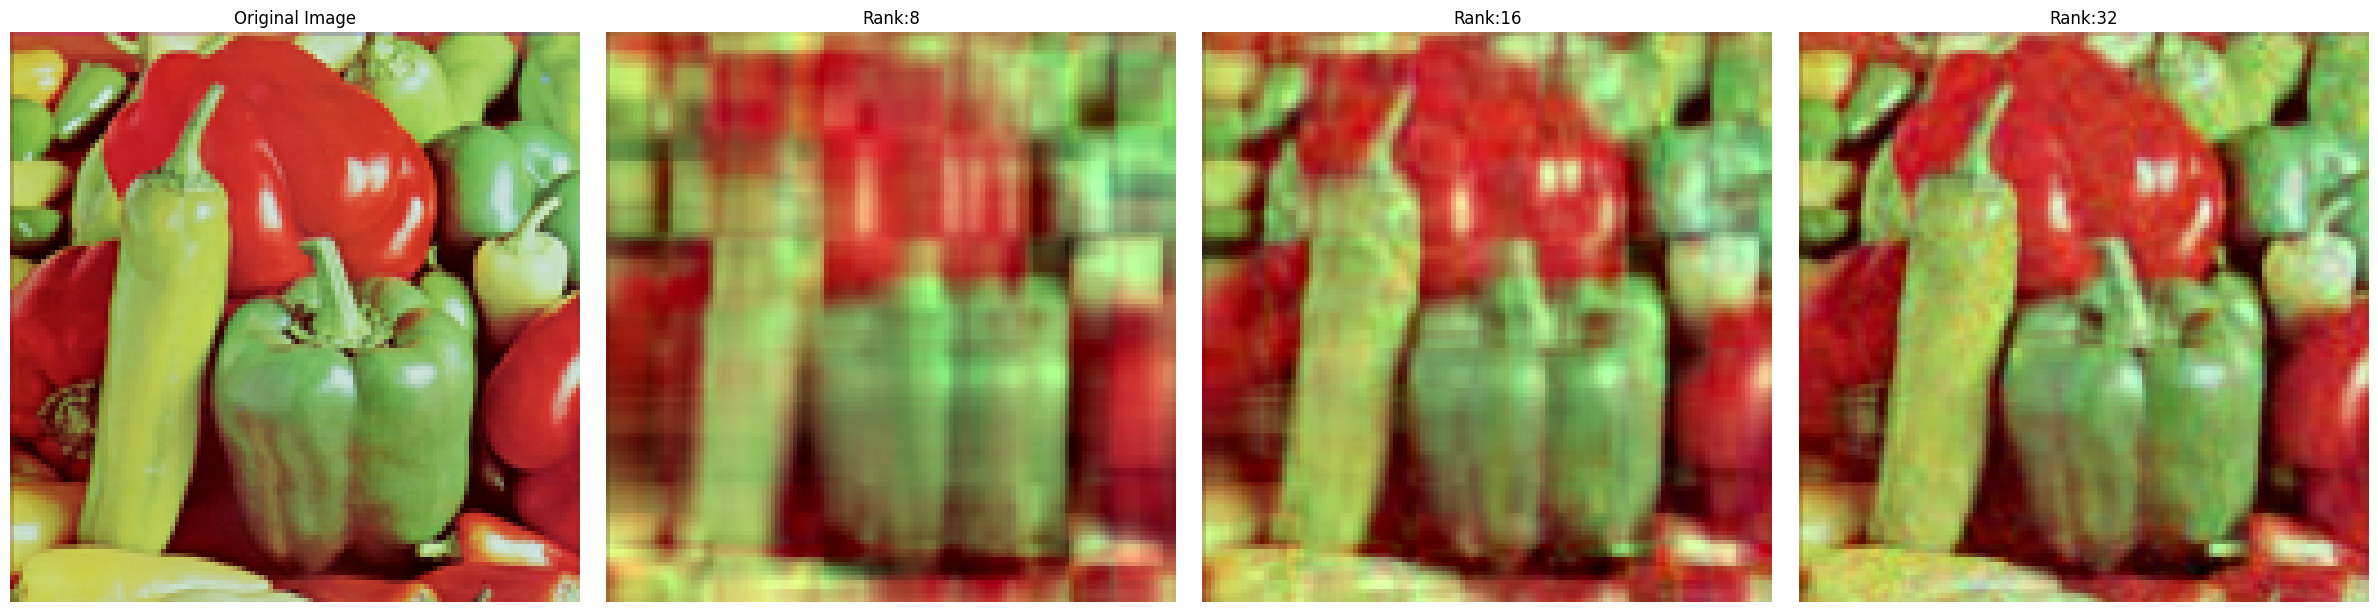

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

# 加载图像
image_path = 'data/image/Peppers.tiff'
img = Image.open(image_path)
img = img.resize((128, 128))
img_tensor = tl.tensor(np.array(img),dtype=tl.float64)

print(f"Orginal image tesor shape:{img_tensor.shape}")

ranks_to_try = [8, 16, 32]
fig,axes = plt.subplots(1,len(ranks_to_try)+1,figsize=(24,6))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i,rank in enumerate(ranks_to_try):
    weight_cp, factor_cp = parafac(img_tensor, rank=rank, init='random', n_iter_max=100)
    reconstructed_tensor = tl.cp_to_tensor((weight_cp, factor_cp))

    # 将分解后的张量转换回图像
    reconstructed_tensor = reconstructed_tensor.clip(0,255).astype(np.uint8)
    axes[i+1].imshow(reconstructed_tensor)
    axes[i+1].set_title(f'Rank:{rank}')
    axes[i+1].axis('off')

mse = np.mean((img - reconstructed_tensor)**2)
print(f'Mean Squared Error: {mse}')

plt.tight_layout()
plt.show()

Original image tensor shape: (128, 128, 3)
Starting CP decomposition for different ranks...


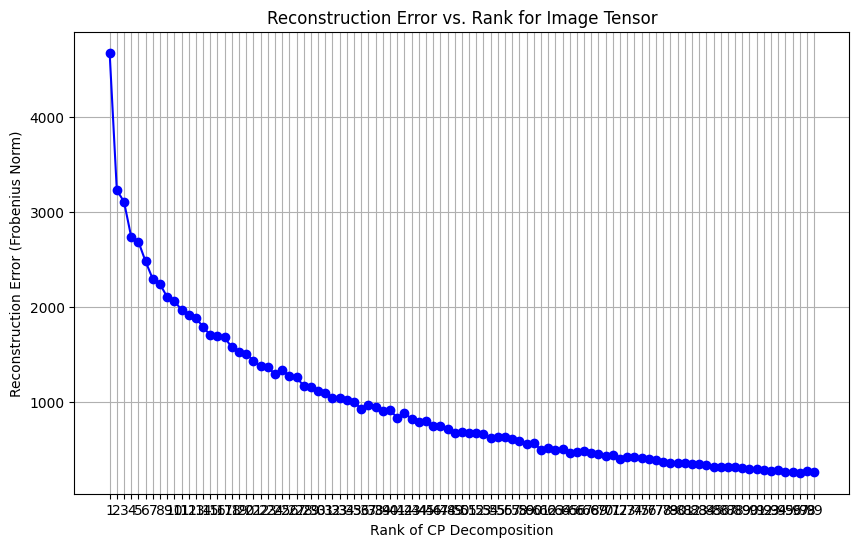

In [20]:
# 绘制 “重构误差”与 “rank” 之间的关系图
# 1. 加载并预处理图像

image_path = 'data/image/SanFrancisco.tiff'
img = Image.open(image_path)
img = img.resize((128, 128)) # 缩小图像以加快计算速度
img_tensor = tl.tensor(np.array(img), dtype=tl.float64)

print(f"Original image tensor shape: {img_tensor.shape}")

# 2. 定义要测试的秩范围
# 我们从秩1开始，一直增加到某个最大值
# 通常最大秩不超过张量任一维度的最小尺寸
max_rank = 100
ranks_to_test = range(1, max_rank)

# 3. 循环进行 CP 分解并计算重构误差
reconstruction_errors = []
print("Starting CP decomposition for different ranks...")

for rank in ranks_to_test:
    # 使用 parafac 进行 CP 分解
    # n_iter_max=100 是为了防止在某些秩下收敛过慢
    weights, factors = parafac(img_tensor, rank=rank, n_iter_max=100, init='random')

    # 从分解结果重构张量
    reconstructed_tensor = tl.cp_to_tensor((weights, factors))

    # 计算重构误差 (使用 Frobenius 范数)
    # Frobenius 范数是向量和矩阵的L2范数在高维空间的推广
    error = tl.norm(img_tensor - reconstructed_tensor)
    reconstruction_errors.append(error)

    # print(f"  Rank {rank}: Reconstruction error = {error:.4f}")

# 4. 绘制曲线图
plt.figure(figsize=(10, 6))
plt.plot(ranks_to_test, reconstruction_errors, marker='o', linestyle='-', color='b')
plt.xlabel("Rank of CP Decomposition")
plt.ylabel("Reconstruction Error (Frobenius Norm)")
plt.title("Reconstruction Error vs. Rank for Image Tensor")
plt.grid(True)
plt.xticks(ranks_to_test)
plt.show()